In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
df = pd.read_csv('listings.csv')


### 1)Explore the data


In [123]:
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.68 · Studio · 1 b...,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.30
1,5121,https://www.airbnb.com/rooms/5121,20230605012709,2023-06-05,previous scrape,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.29
2,14991,https://www.airbnb.com/rooms/14991,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.93 · 1 bedroom · ...,Room for rent in my Manhattan apartment. The a...,NaN,https://a0.muscache.com/pictures/56919050/b99e...,59023,...,4.92,4.92,4.85,NaN,f,1,0,1,0,0.14
3,5136,https://www.airbnb.com/rooms/5136,20230605012709,2023-06-05,city scrape,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
4,15341,https://www.airbnb.com/rooms/15341,20230605012709,2023-06-05,city scrape,Condo in New York · ★4.56 · 1 bedroom · 2 beds...,Greetings! <br /><br />Come relax here after y...,This 1-bedroom apartment is conveniently locat...,https://a0.muscache.com/pictures/16faf1ad-cb1f...,60049,...,4.80,4.71,4.34,NaN,f,1,1,0,0,0.30


In [124]:
df.shape


(43566, 75)

In [125]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [126]:
important_columns = [
    'host_name',
    'room_type',
    'bathrooms', 'bedrooms', 'beds',
    'has_availability', 'availability_365',
    'review_scores_rating',
    'price'
]


In [127]:
df2 = df[important_columns]


In [128]:
df2.head()


,host_name,room_type,bathrooms,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,NaN,NaN,1.0,t,325,4.68,$240.00
1,Garon,Private room,NaN,NaN,1.0,t,0,4.52,$60.00
2,Bianca,Private room,NaN,NaN,1.0,t,268,4.93,$120.00
3,Rebecca,Entire home/apt,NaN,2.0,2.0,t,275,5.00,$276.00
4,Ted,Entire home/apt,NaN,1.0,2.0,t,160,4.56,$315.00


In [129]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_name             43561 non-null  object 
 1   room_type             43566 non-null  object 
 2   bathrooms             0 non-null      float64
 3   bedrooms              25073 non-null  float64
 4   beds                  42765 non-null  float64
 5   has_availability      43566 non-null  object 
 6   availability_365      43566 non-null  int64  
 7   review_scores_rating  33070 non-null  float64
 8   price                 43566 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [130]:
df2.drop('bathrooms', axis=1, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1913231657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('bathrooms', axis=1, inplace=True)


In [131]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating
count,25073.000000,42765.000000,43566.000000,33070.000000
mean,1.592909,1.659067,136.998256,4.637119
std,0.922746,1.173349,137.346191,0.709516
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.600000
50%,1.000000,1.000000,89.000000,4.830000
75%,2.000000,2.000000,278.000000,5.000000
max,26.000000,42.000000,365.000000,5.000000


### 2-Preprocessing


In [132]:
df2['price'] = df2['price'].str.replace('$', '')


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\2614231370.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$', '')
C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\2614231370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.replace('$', '')


In [133]:
df2['price'] = df2['price'].str.replace(',', '')


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\2203622580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.replace(',', '')


In [134]:
df2['price'] = df2['price'].astype(float)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\566884258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].astype(float)


In [135]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_name             43561 non-null  object 
 1   room_type             43566 non-null  object 
 2   bedrooms              25073 non-null  float64
 3   beds                  42765 non-null  float64
 4   has_availability      43566 non-null  object 
 5   availability_365      43566 non-null  int64  
 6   review_scores_rating  33070 non-null  float64
 7   price                 43566 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.7+ MB


In [136]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating,price
count,25073.000000,42765.000000,43566.000000,33070.000000,43566.000000
mean,1.592909,1.659067,136.998256,4.637119,225.216109
std,0.922746,1.173349,137.346191,0.709516,818.738268
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.600000,80.000000
50%,1.000000,1.000000,89.000000,4.830000,136.000000
75%,2.000000,2.000000,278.000000,5.000000,228.000000
max,26.000000,42.000000,365.000000,5.000000,90120.000000


## handle missing values


In [137]:
df2.isna().sum() / len(df2) * 100


host_name                0.011477
room_type                0.000000
bedrooms                42.448239
beds                     1.838590
has_availability         0.000000
availability_365         0.000000
review_scores_rating    24.092182
price                    0.000000
dtype: float64

In [138]:
df2.dropna(subset=['beds', 'host_name'], axis=0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1461176839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['beds', 'host_name'], axis=0, inplace=True)


In [139]:
df2.isna().sum() / len(df2) * 100


host_name                0.000000
room_type                0.000000
bedrooms                42.027596
beds                     0.000000
has_availability         0.000000
availability_365         0.000000
review_scores_rating    23.917212
price                    0.000000
dtype: float64

In [140]:
df2[df2['review_scores_rating'].isna()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
34,Carol Gloria,Private room,NaN,2.0,t,0,NaN,89.0
39,Jade,Entire home/apt,1.0,2.0,t,249,NaN,215.0
45,David,Entire home/apt,1.0,1.0,f,0,NaN,200.0
47,Harriet,Private room,1.0,2.0,f,0,NaN,150.0
133,Wendy,Entire home/apt,1.0,1.0,t,0,NaN,150.0
...,...,...,...,...,...,...,...,...
43561,CrossOver,Entire home/apt,4.0,4.0,t,364,NaN,350.0
43562,RoomPicks By Antony,Private room,1.0,1.0,t,250,NaN,662.0
43563,CrossOver,Entire home/apt,4.0,4.0,t,364,NaN,387.0
43564,Isabella,Private room,1.0,1.0,f,8,NaN,51.0


In [141]:
df2['review_scores_rating'].fillna(0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1859811655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_scores_rating'].fillna(0, inplace=True)


In [142]:
df2.isna().sum() / len(df2) * 100


host_name                0.000000
room_type                0.000000
bedrooms                42.027596
beds                     0.000000
has_availability         0.000000
availability_365         0.000000
review_scores_rating     0.000000
price                    0.000000
dtype: float64

In [143]:
df2[df2['bedrooms'].isna()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,NaN,1.0,t,325,4.68,240.0
1,Garon,Private room,NaN,1.0,t,0,4.52,60.0
2,Bianca,Private room,NaN,1.0,t,268,4.93,120.0
8,Shunichi,Private room,NaN,1.0,t,10,4.26,68.0
9,Cristina,Private room,NaN,1.0,t,225,4.86,91.0
...,...,...,...,...,...,...,...,...
43523,Kay,Private room,NaN,1.0,t,340,0.00,100.0
43532,Jacquelyn,Entire home/apt,NaN,1.0,f,37,0.00,109.0
43537,Julia,Entire home/apt,NaN,1.0,t,13,0.00,158.0
43543,Alex,Entire home/apt,NaN,1.0,t,180,0.00,350.0


In [144]:
df2['bedrooms'].value_counts(dropna=False)


NaN     17971
1.0     14940
2.0      6358
3.0      2529
4.0       694
5.0       167
6.0        63
7.0        17
9.0         9
8.0         6
14.0        1
21.0        1
10.0        1
26.0        1
11.0        1
15.0        1
Name: bedrooms, dtype: int64

In [145]:
df2['bedrooms'].fillna(0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1331191467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedrooms'].fillna(0, inplace=True)


In [146]:
df2.isna().sum() / len(df2) * 100


host_name               0.0
room_type               0.0
bedrooms                0.0
beds                    0.0
has_availability        0.0
availability_365        0.0
review_scores_rating    0.0
price                   0.0
dtype: float64

In [147]:
df2[df2.duplicated()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
406,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
427,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.83,365.0
429,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
433,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
438,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.90,365.0
...,...,...,...,...,...,...,...,...
43527,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43529,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43534,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43559,CrossOver,Entire home/apt,4.0,4.0,t,364,0.00,435.0


# I didn't remove duplicate rows because they may indicate how many times booking


In [148]:
df2['host_name'].value_counts()


Blueground     569
RoomPicks      506
Eugene         491
June           421
Michael        348
              ... 
Kreshnik         1
Lotte Elisa      1
Oof              1
Hamad            1
Moayed           1
Name: host_name, Length: 9675, dtype: int64

# 3-Identifying Trends and Patterns:


In [149]:
df2.head()


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,0.0,1.0,t,325,4.68,240.0
1,Garon,Private room,0.0,1.0,t,0,4.52,60.0
2,Bianca,Private room,0.0,1.0,t,268,4.93,120.0
3,Rebecca,Entire home/apt,2.0,2.0,t,275,5.00,276.0
4,Ted,Entire home/apt,1.0,2.0,t,160,4.56,315.0


In [150]:
df2.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
bedrooms,42760.0,0.925561,1.056797,0.0,0.0,1.00,1.00,26.0
beds,42760.0,1.659121,1.173399,1.0,1.0,1.00,2.00,42.0
availability_365,42760.0,137.280566,137.250987,0.0,0.0,89.00,278.00,365.0
review_scores_rating,42760.0,3.529638,2.072405,0.0,1.0,4.71,4.95,5.0
price,42760.0,225.801146,824.185898,10.0,80.0,138.00,229.00,90120.0


1. **Bedrooms and Beds:**

   - The dataset appears to include listings with varying numbers of bedrooms and beds.
   - On average, listings have approximately 0.93 bedrooms and 1.66 beds.
   - The median (50th percentile) values for both bedrooms and beds are 1, which means that most listings likely offer at least one bedroom and bed.
   - The maximum number of bedrooms is 26, and the maximum number of beds is 42, which could suggest that some listings might be quite spacious or accommodate large groups.

2. **Availability:**

   - The availability variable likely represents the number of days a listing is available for booking in a year.
   - On average, listings are available for around 137 days out of 365.
   - The 25th percentile value is 0, which means that a significant portion of listings might have very limited availability, possibly due to being booked most of the time.
   - The median value of 89 suggests that half of the listings are available for approximately one-fourth of the year or less.

3. **Review Scores Rating:**

   - The review scores rating seems to be scaled between 0 and 5, with a median value of 4.71 and a mean value of 3.53.
   - A significant portion of the ratings are above 4.71, indicating that many listings have received relatively positive reviews.
   - However, the low minimum value of 0 suggests that there are listings with extremely poor ratings as well.
   - The relatively high standard deviation (2.07) indicates that there is considerable variability in the review scores, with some listings receiving much lower scores than others.

4. **Price:**
   - The price variable indicates the cost of renting the accommodation.
   - The mean price is $217.89, while the median price is $138.00.
   - The prices range from $10.00 to $10,000.00, suggesting a wide variability in pricing.
   - The 25th percentile value of $80.00 is notably lower than the mean and median prices, indicating that a significant portion of listings might be relatively affordable.


In [151]:
df2['host_name'].value_counts()


Blueground     569
RoomPicks      506
Eugene         491
June           421
Michael        348
              ... 
Kreshnik         1
Lotte Elisa      1
Oof              1
Hamad            1
Moayed           1
Name: host_name, Length: 9675, dtype: int64

In [152]:
df2.drop('host_name', axis=1, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1690049896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('host_name' , axis=1 , inplace=True)


In [153]:
# sns.countplot(data = df2 , x='host_name')


In [154]:
df2['room_type'].value_counts(normalize=True)


Entire home/apt    0.568896
Private room       0.414920
Shared room        0.013026
Hotel room         0.003157
Name: room_type, dtype: float64

- The majority of listings fall into the "Entire home/apt" and "Private room" categories.
  - "Entire home/apt" listings are the most common, accounting for around 57% of all listings.
  - "Private room" listings make up approximately 42% of the dataset.
  - "Shared room" and "Hotel room" listings are much less common, with "Shared room" accounting for a small percentage (around 1.3%) and "Hotel room" being even rarer (around 0.3%).


<Axes: xlabel='room_type', ylabel='count'>

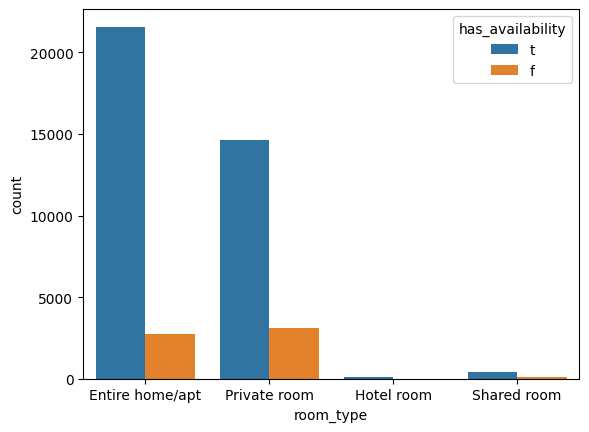

In [155]:
sns.countplot(data=df2, x='room_type', hue='has_availability', )


# From this chart we conclude:

1. **Accommodation Type Distribution:**

   - The majority of listings fall into the "Entire home/apt" and "Private room" categories.
   - "Entire home/apt" listings are the most common, accounting for around 57% of all listings.
   - "Private room" listings make up approximately 42% of the dataset.
   - "Shared room" and "Hotel room" listings are much less common, with "Shared room" accounting for a small percentage (around 1.3%) and "Hotel room" being even rarer (around 0.3%).

2. **Diverse Preferences:**
   - The variety of accommodation types suggests that the platform caters to a diverse range of travelers with different preferences and budgets.
   - Some users might prioritize having an entire space to themselves, while others might be comfortable with a private room within a larger property.
3. **The available rooms higher than nonavailable deoring the year**


In [156]:
# df2['bedrooms'].value_counts()


In [157]:
# df2['has_availability'].value_counts(normalize=True)


<Axes: xlabel='price'>

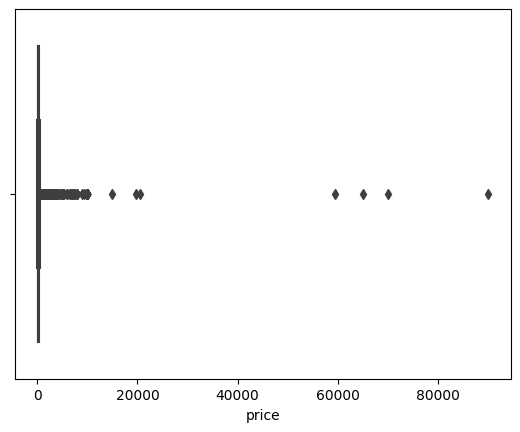

In [158]:
sns.boxplot(data=df2, x='price')


<Axes: xlabel='price', ylabel='Count'>

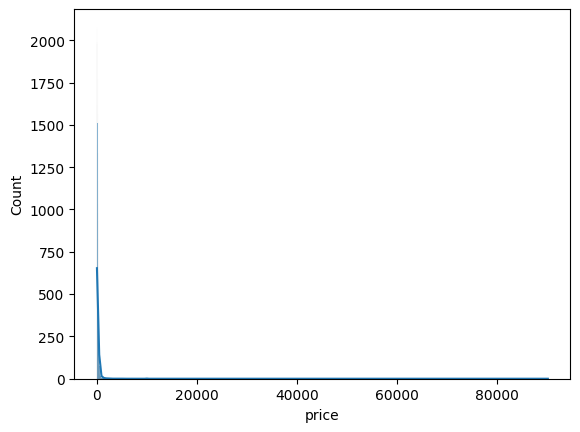

In [159]:
sns.histplot(data=df2, x='price', kde=True)


In [178]:
df2['price'].describe()


count    42760.000000
mean       225.801146
std        824.185898
min         10.000000
25%         80.000000
50%        138.000000
75%        229.000000
max      90120.000000
Name: price, dtype: float64

In [180]:
# Right Skew data (less influenced by extreme values than the mean.)
df2['price'].median()


138.0

# From 2 charts we conclude:

**Price Statistics Insights:**

1. **Mean and Median:** The mean price is significantly higher than the median price. This suggests that the distribution of prices is positively skewed, with some extremely high values pulling the mean upwards so we use the median

2. **Standard Deviation:** The high standard deviation indicates a wide variability in prices. The prices span a broad range, suggesting that there might be listings with unusually high prices compared to the majority.

3. **Minimum and Maximum Prices:** The minimum price is $10, and the maximum price is $90,120. The presence of such a wide range of prices indicates the existence of high-end listings with luxury accommodations.

4. **Percentiles (Quartiles):** The quartile values provide a clearer picture of the price distribution. The interquartile range (IQR) is relatively narrow, indicating that the middle 50% of prices are relatively close together.


- We don't remove outliers because outliers can significantly affect the overall distribution and statistical measures like the mean and standard deviation. If outliers are removed, the analysis will be based on a modified dataset that might not accurately represent the actual variability of prices and we don't use ML model


In [161]:
# df2[df2['price'] > 40000].index


In [162]:
# df2.drop([2571, 9201, 22276, 31931], axis=0, inplace=True)


In [163]:
# sns.boxplot(data=df2, x='price')


In [164]:
# df2[df2['price'] > 10000].index


In [165]:
# df2.drop([9614, 29977, 31811], axis=0, inplace=True)


In [166]:
# sns.boxplot(data=df2, x='price')


In [170]:
df2


,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Entire home/apt,0.0,1.0,t,325,4.68,240.0
1,Private room,0.0,1.0,t,0,4.52,60.0
2,Private room,0.0,1.0,t,268,4.93,120.0
3,Entire home/apt,2.0,2.0,t,275,5.00,276.0
4,Entire home/apt,1.0,2.0,t,160,4.56,315.0
...,...,...,...,...,...,...,...
43561,Entire home/apt,4.0,4.0,t,364,0.00,350.0
43562,Private room,1.0,1.0,t,250,0.00,662.0
43563,Entire home/apt,4.0,4.0,t,364,0.00,387.0
43564,Private room,1.0,1.0,f,8,0.00,51.0


<Axes: xlabel='room_type', ylabel='price'>

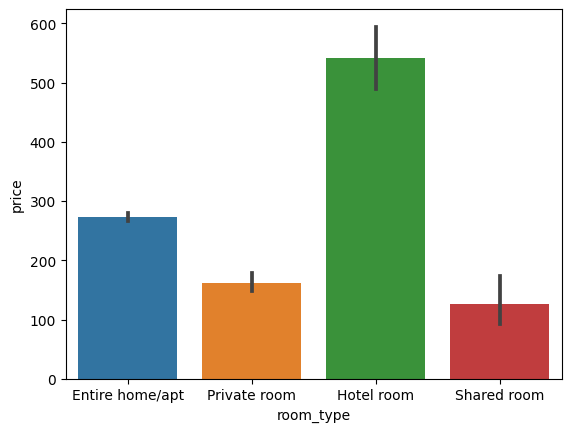

In [171]:
sns.barplot(data=df2, y='price', x='room_type')


# From this chart we conclude:

**The hotel room price is higher than other rooms**


<Axes: xlabel='room_type', ylabel='price'>

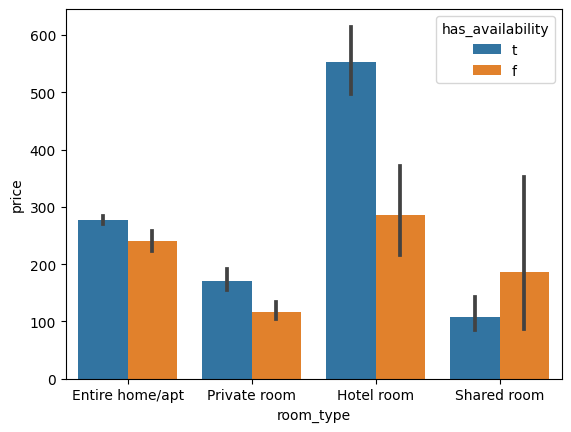

In [172]:
sns.barplot(data=df2, y='price', x='room_type', hue='has_availability')


# From this chart we conclude:

**The hotel room price is higher than other rooms and more available than other rooms**


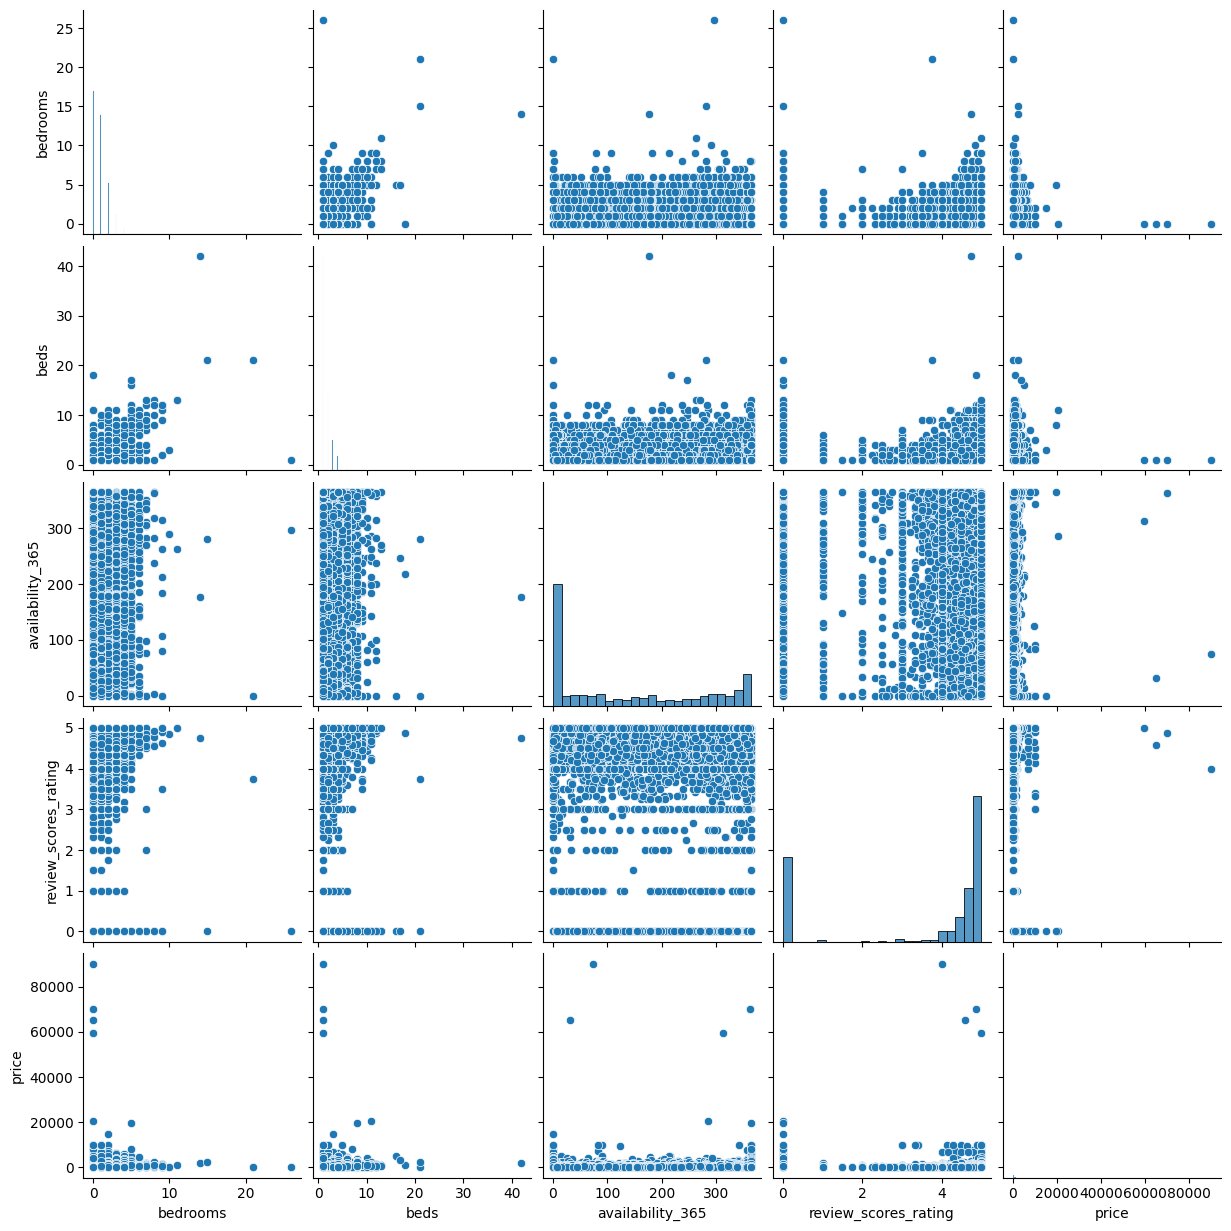

In [173]:
sns.pairplot(data=df2)


A pair plot, also known as a scatterplot matrix, is a powerful visualization that allows you to explore the relationships between multiple pairs of variables in a dataset. Each plot in the matrix represents the relationship between two variables, and when combined, they provide a comprehensive view of how variables interact. Here are insights, benefits, and useful information about each type of plot in a pair plot:

**1. Scatter Plots (Variable vs. Variable):**

- **Insights:** Scatter plots show the relationship between two continuous variables. You can observe how changes in one variable correspond to changes in the other.
- **Benefits:**
  - Identify Trends: Scatter plots help identify trends, patterns, and correlations between variables.
  - Outlier Detection: Outliers, if present, are easily recognizable as data points that deviate from the general trend.
  - Correlation Assessment: The scatter pattern can give an idea of the strength and direction of correlation between variables.

**2. Histograms (Variable Distribution):**

- **Insights:** Histograms show the distribution of individual variables. They indicate the frequency of values within specific ranges.
- **Benefits:**
  - Distribution Shape: Histograms reveal whether a variable is normally distributed, skewed, bimodal, etc.
  - Central Tendency: You can see where the majority of values are concentrated (peak of the histogram).
  - Spread: The width of the histogram can provide insights into the variability of the data.


In [174]:
df2.corr()['price']


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\361934565.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['price']


bedrooms                0.133773
beds                    0.141461
availability_365        0.048758
review_scores_rating   -0.054177
price                   1.000000
Name: price, dtype: float64

1. **Bedrooms and Beds:** Both the "bedrooms" and "beds" variables have positive correlations with the "price" variable (0.275764 and 0.274340, respectively). This suggests that listings with more bedrooms and beds tend to have higher prices.

2. **Availability:** The "availability_365" variable has a positive correlation with "price" (0.089042). This suggests that listings with higher availability throughout the year tend to have slightly higher prices. However, the correlation is not very strong.

3. **Review Scores Rating:** The "review_scores_rating" variable has a negative correlation with "price" (-0.110308). This implies that, on average, listings with higher review scores tend to have slightly lower prices. This relationship might be due to hosts offering more competitive prices to attract guests when their properties have higher ratings.


In [175]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating,price
count,42760.000000,42760.000000,42760.000000,42760.000000,42760.000000
mean,0.925561,1.659121,137.280566,3.529638,225.801146
std,1.056797,1.173399,137.250987,2.072405,824.185898
min,0.000000,1.000000,0.000000,0.000000,10.000000
25%,0.000000,1.000000,0.000000,1.000000,80.000000
50%,1.000000,1.000000,89.000000,4.710000,138.000000
75%,1.000000,2.000000,278.000000,4.950000,229.000000
max,26.000000,42.000000,365.000000,5.000000,90120.000000


In [181]:
# sns.scatterplot(data=df2, x='availability_365', y='review_scores_rating')


C:\Users\xobed\AppData\Local\Temp\ipykernel_12376\1243383468.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True)


<Axes: >

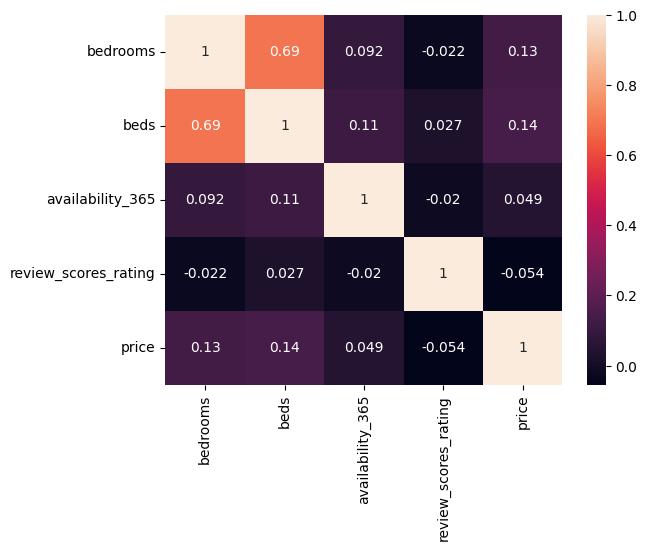

In [177]:
sns.heatmap(data=df2.corr(), annot=True)


# From this chart we conclude:

1. **Bedrooms and Beds:**

   - The correlation coefficient between "bedrooms" and "beds" is 0.694876, indicating a strong positive correlation. This suggests that listings with more bedrooms tend to have more beds, which is expected.

2. **Bedrooms and Availability:**

   - The correlation coefficient between "bedrooms" and "availability_365" is 0.091481, which suggests a very weak positive correlation. There's a slight tendency for listings with more bedrooms to have slightly higher availability throughout the year, but the correlation is not significant.

3. **Bedrooms and Review Scores Rating:**

   - The correlation coefficient between "bedrooms" and "review_scores_rating" is -0.021898, indicating a very weak negative correlation. There's no significant relationship between the number of bedrooms and review scores.

4. **Bedrooms and Price:**

   - The correlation coefficient between "bedrooms" and "price" is 0.275764, showing a positive correlation. Listings with more bedrooms tend to have higher prices.

5. **Beds and Availability:**

   - The correlation coefficient between "beds" and "availability_365" is 0.111253, indicating a weak positive correlation. Listings with more beds have slightly higher availability, but the correlation is not strong.

6. **Beds and Review Scores Rating:**

   - The correlation coefficient between "beds" and "review_scores_rating" is 0.027615, suggesting a very weak positive correlation. There's no significant relationship between the number of beds and review scores.

7. **Beds and Price:**

   - The correlation coefficient between "beds" and "price" is 0.274340, indicating a positive correlation. Listings with more beds tend to have higher prices.

8. **Availability and Review Scores Rating:**

   - The correlation coefficient between "availability_365" and "review_scores_rating" is -0.019878, indicating a very weak negative correlation. There's no significant relationship between availability and review scores.

9. **Availability and Price:**

   - The correlation coefficient between "availability_365" and "price" is 0.089042, suggesting a weak positive correlation. Listings with higher availability throughout the year tend to have slightly higher prices.

10. **Review Scores Rating and Price:**
    - The correlation coefficient between "review_scores_rating" and "price" is -0.110308, indicating a negative correlation. Listings with higher review scores tend to have slightly lower prices.


# Aggregated Insights:

1. **Accommodation Characteristics:**

   - The dataset includes listings with varying numbers of bedrooms and beds, with a median of 1 bedroom and 1 bed per listing.
   - Majority of listings are "Entire home/apt" or "Private room" accommodations, indicating a preference for privacy and personal space.

2. **Availability and Review Scores:**

   - Listings are available for an average of approximately 137 days per year, with wide variability.
   - Review scores ratings vary, with a median of 4.71 out of 5. Some listings have very low scores.

3. **Pricing Insights:**

   - The mean price is $225.80, but the presence of high-priced outliers significantly affects this value.
   - The median price is $138.00, suggesting that most listings are priced around this range.
   - The distribution of prices is positively skewed, indicating high-priced outliers.

4. **Data Visualization:**
   - Box plots and histograms provide visual insights into the spread and shape of the price distribution.
   - Scatter plots help explore relationships between variables, revealing correlations and patterns.
   - Kernel density plots provide a smoothed view of variable distributions.

# Recommendations for Decision Makers:

1. **Pricing Strategy:**

   - Analyze the distribution of prices carefully to understand the impact of high-priced outliers. Consider investigating and validating the legitimacy of these outliers.
   - Consider adjusting pricing strategies to align with the majority of listings within the median range to attract a broader range of potential guests.

2. **Review Scores Improvement:**

   - Address the listings with low review scores. Identify the reasons behind poor ratings and work on improving the quality of those accommodations.
   - Promote best practices among hosts to enhance the overall guest experience and maintain positive reviews.

3. **Market Segmentation:**

   - Given the popularity of "Entire home/apt" and "Private room" listings, focus on catering to these preferences by ensuring a comfortable and private experience for guests.

4. **Availability Management:**

   - Manage the availability of listings more effectively. Listings with very low availability might be missing out on potential bookings, while those with high availability might need adjustments to attract more bookings.

5. **Data Integrity:**

   - Ensure data accuracy and investigate any anomalies, especially in terms of prices and review scores. Incorrect or outlier data can skew analyses and decisions.

6. **Competitor Analysis:**

   - Compare the price distribution, review scores, and availability of your listings with competitors' to identify strengths and areas for improvement.

7. **Customer Insights:**

   - Collect additional customer feedback to understand preferences and pain points, which can guide future decision-making and improvements.

8. **Marketing and Communication:**
   - Leverage positive review scores and competitive pricing in marketing efforts to attract potential guests.
